In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

project_path = "/content/drive/MyDrive/Colab Notebooks"
cleaned_path = project_path + "/Data/heart_disease_cleaned.csv"
selected_path = project_path + "/Data/heart_disease_selected.csv"

# 3. Load dataset
df = pd.read_csv(cleaned_path)
target_col = "target"   # change if your dataset uses a different name

print("Original target distribution:")
print(df[target_col].value_counts())

# 🔹 FIX: Convert target to binary (0 = no disease, 1 = has disease)
df[target_col] = df[target_col].apply(lambda x: 1 if x > 0 else 0)

print("\nUpdated target distribution (binary):")
print(df[target_col].value_counts())


X = df.drop(columns=[target_col])
y = df[target_col]


Original target distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Updated target distribution (binary):
target
0    164
1    139
Name: count, dtype: int64


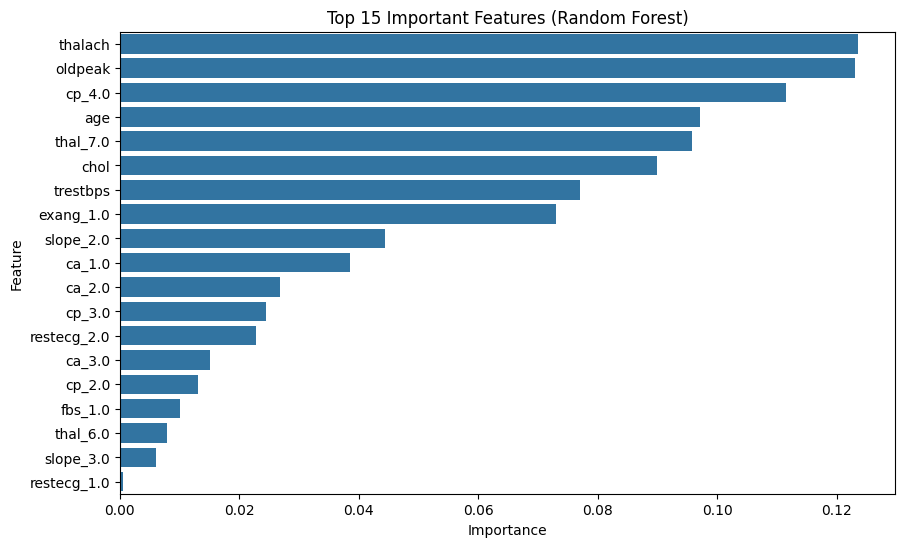

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feat_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(15))


plt.title("Top 15 Important Features (Random Forest)")
plt.show()


In [8]:
model = LogisticRegression(max_iter=500, solver="liblinear")
rfe = RFE(model, n_features_to_select=8)  # keep top 8
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features_rfe.tolist())


Selected features by RFE: ['oldpeak', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'thal_7.0', 'ca_1.0', 'ca_2.0', 'ca_3.0']


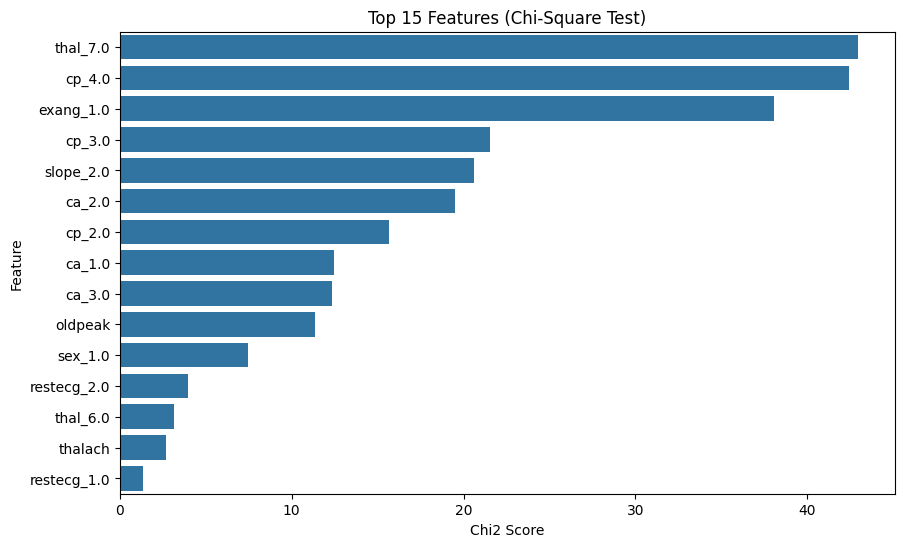

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi_scores = chi2(X_scaled, y)
chi2_df = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi_scores[0]})
chi2_df = chi2_df.sort_values(by="Chi2 Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Chi2 Score", y="Feature", data=chi2_df.head(15))
plt.title("Top 15 Features (Chi-Square Test)")
plt.show()


In [11]:

df_selected = df[selected_features_rfe.tolist() + [target_col]]


df_selected.to_csv(selected_path, index=False)
df_selected.head()
print("Saved reduced dataset at:", selected_path)


Saved reduced dataset at: /content/drive/MyDrive/Colab Notebooks/Data/heart_disease_selected.csv
